                       0                                                1  \
0                    NaT  Economic Activity, Industrial Production, Index   
1    1960-01-01 00:00:00                                        11.234317   
2    1960-02-01 00:00:00                                        12.638607   
3    1960-03-01 00:00:00                                         13.62987   
4    1960-04-01 00:00:00                                        12.721212   
5    1960-05-01 00:00:00                                        12.803817   
6    1960-06-01 00:00:00                                        12.803817   
7    1960-07-01 00:00:00                                        12.969028   
8    1960-08-01 00:00:00                                        12.803817   
9    1960-09-01 00:00:00                                        13.382054   
10   1960-10-01 00:00:00                                         13.62987   
11   1960-11-01 00:00:00                                        13.960291   

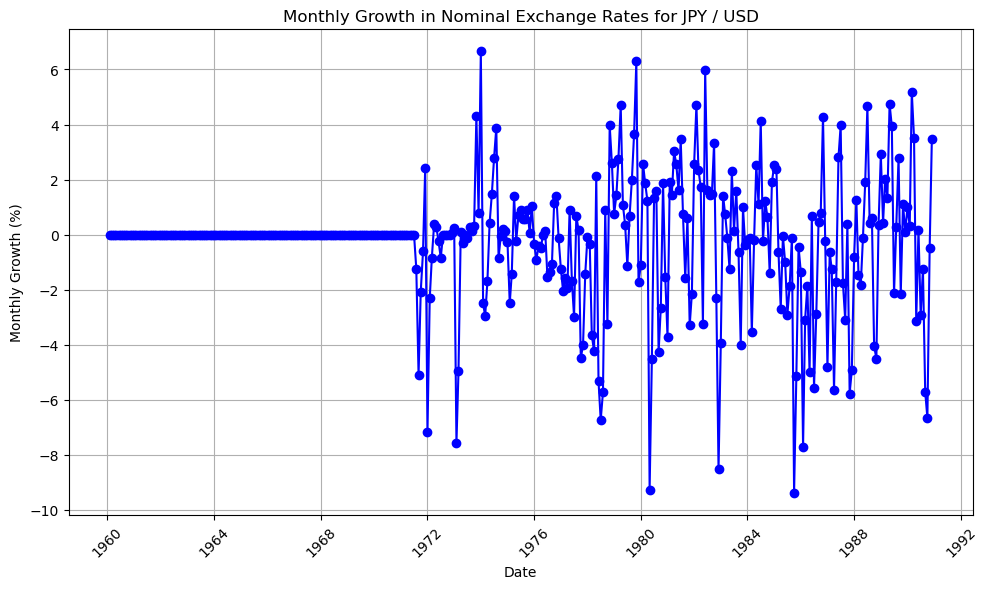

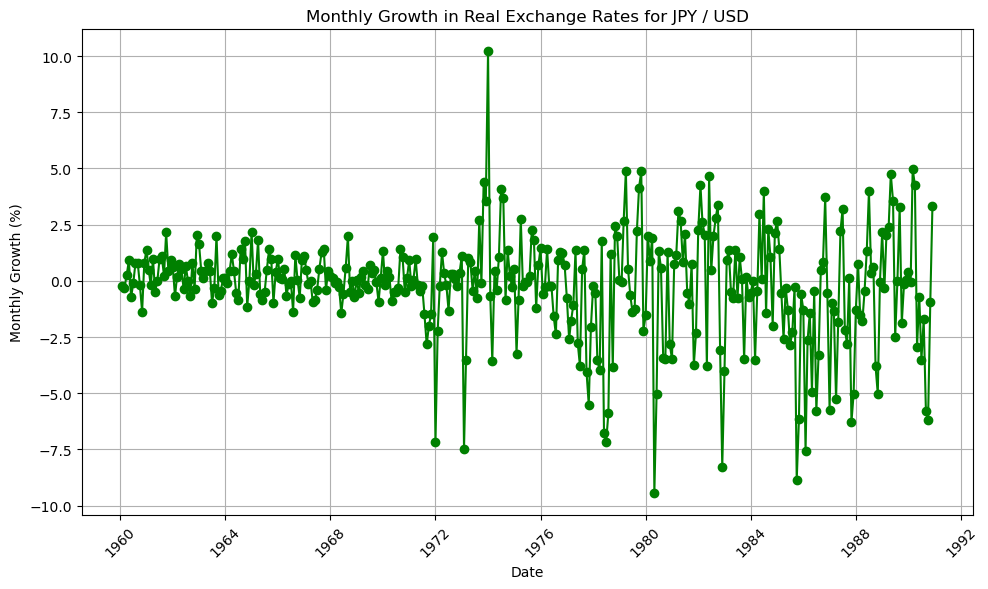

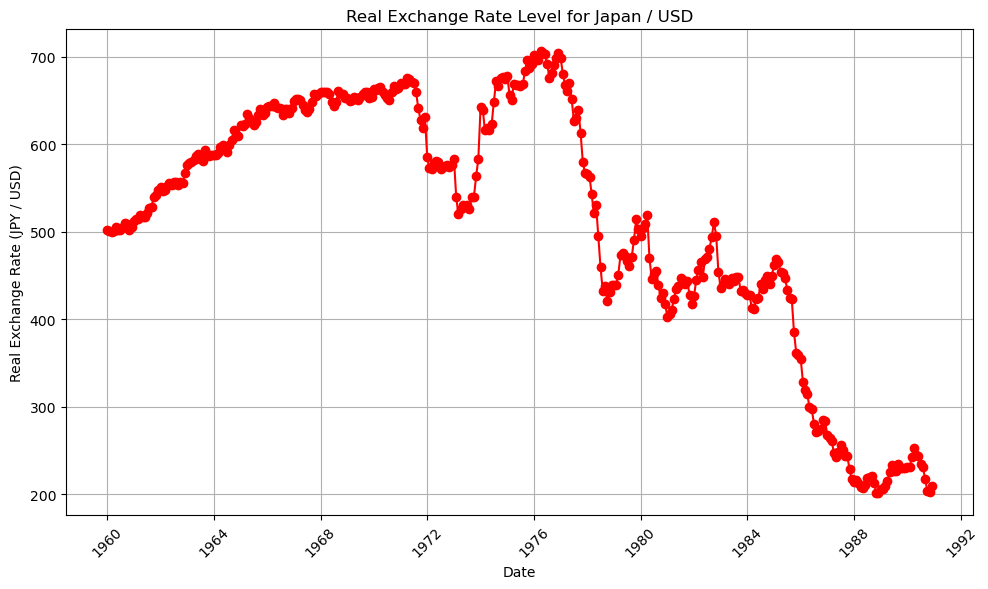

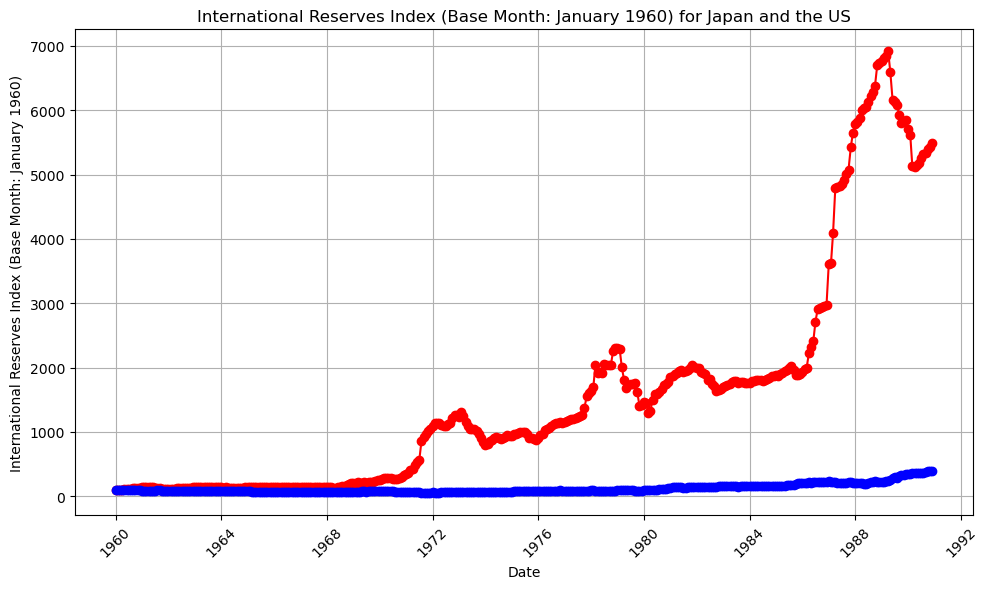

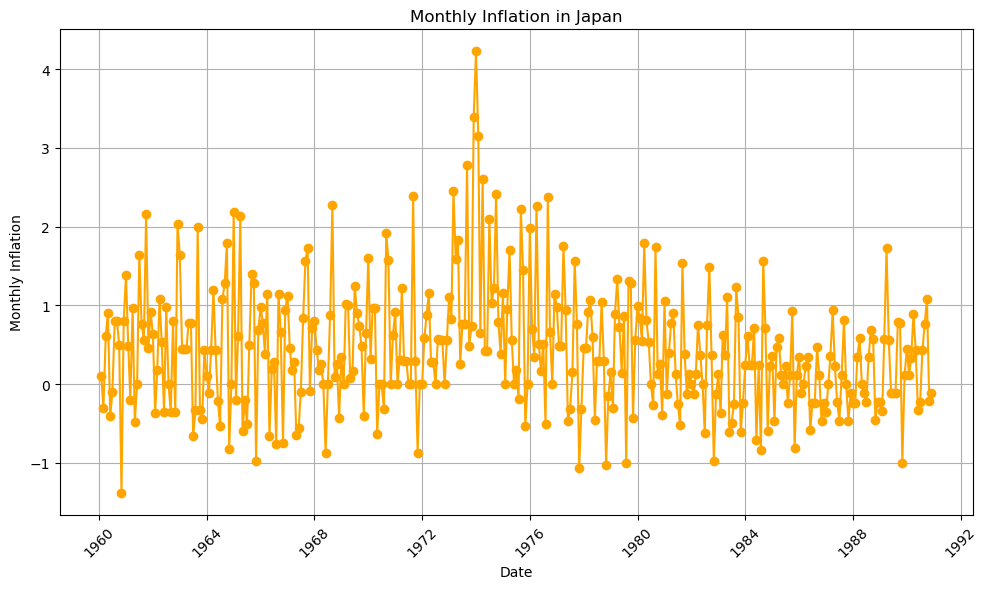

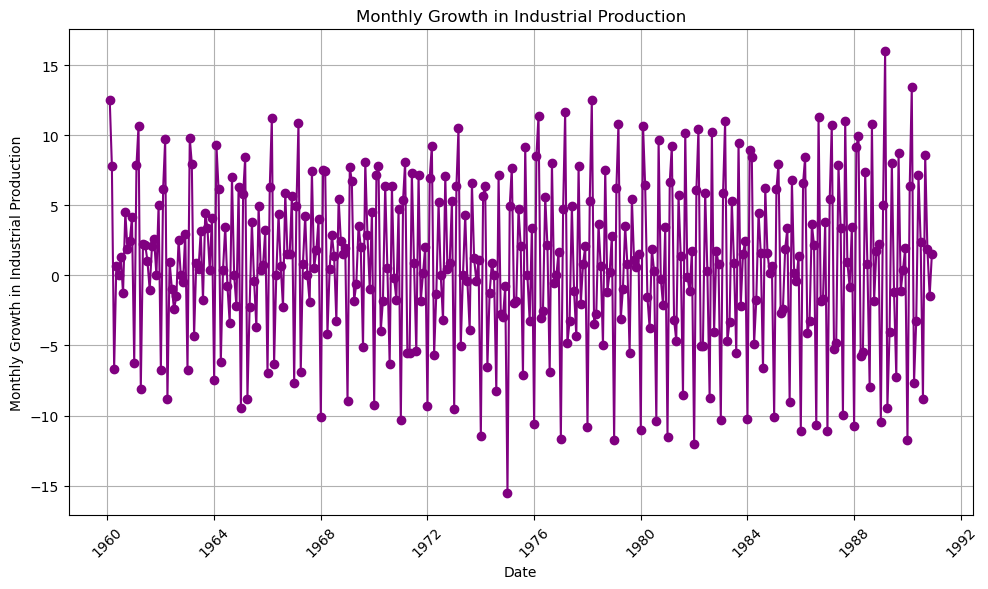

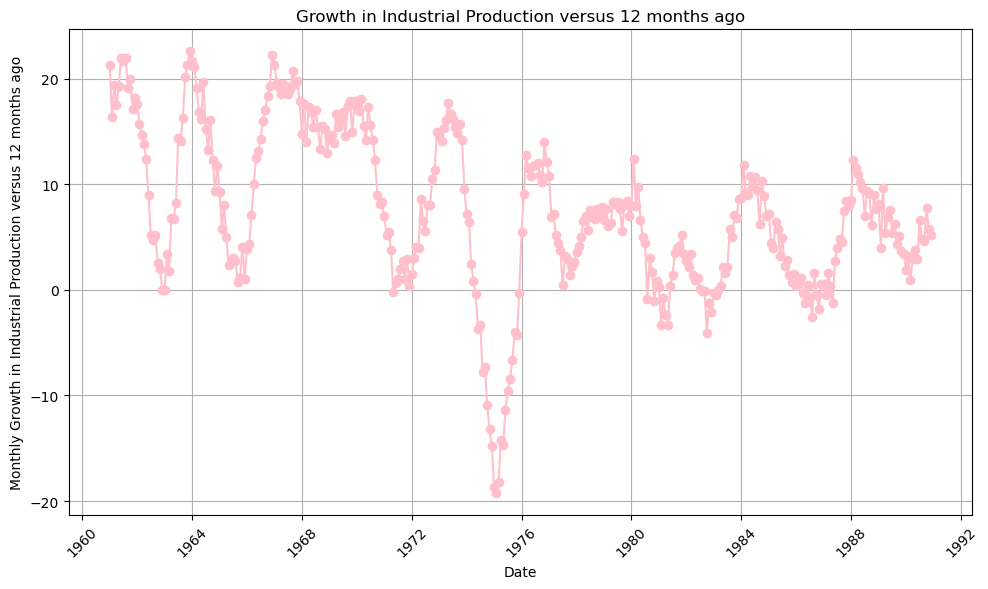

+----------------------------------------------------+---------------------------+--------------------------+---------------+
|                                                    |   SD before Bretton Woods |   SD after Bretton Woods |   Ratio of SD |
+====================================================+===========================+==========================+===============+
| Monthly Growth of Nominal Exchange Rate            |                  0        |                 2.86837  |      0        |
+----------------------------------------------------+---------------------------+--------------------------+---------------+
| Monthly Growth of Real Exchange Rate               |                  0.786454 |                 2.94281  |      0.267246 |
+----------------------------------------------------+---------------------------+--------------------------+---------------+
| Inflation Rate (JPY/USD)                           |                 27.2339   |                15.4217   |      1.7

In [173]:
# Import dataset of variables for Japan into Python
import pandas as pd

# Allow the python to access the downloads file to access the relevant data for Japan
japan_file = '/Users/umikavekaria/Documents/GitHub/EC1B1-Group-42/International_Financial_Statistics_Japan.xlsx'

# Allow the python to access the downloads file to access the relevant data for US
us_file = '/Users/umikavekaria/Documents/GitHub/EC1B1-Group-42/International_Financial_Statistics_US.xlsx'

# Load these files into a Panda DataFrame
japan_df = pd.read_excel(japan_file)
us_df = pd.read_excel(us_file)

# Merge the two datasets together in Python
merged_df = pd.concat([japan_df, us_df], axis=1)

# Create a new DataFrame by copying the data from the merged_df
df = pd.DataFrame(merged_df)

# Delete the duplicate column of the dates from the USA file
# Reset column names to ensure uniqueness
df.columns = range(df.shape[1])

# Delete the duplicate dates at index 5
column_index_to_delete = 5
df.drop(column_index_to_delete, axis=1, inplace=True)




# Assign each column to a variable, except exchange rates (deal with this seperately)
# Convert each column to numeric, handling errors by coercing non-numeric values to NaN
industrial_production_japan = pd.to_numeric(df.iloc[:, 1], errors='coerce')
international_reserves_japan = pd.to_numeric(df.iloc[:, 3], errors='coerce')
cpi_japan = pd.to_numeric(df.iloc[:, 4], errors='coerce')

international_reserves_usa = pd.to_numeric(df.iloc[:, -2], errors='coerce')
cpi_usa = pd.to_numeric(df.iloc[:, -1], errors='coerce')

# Convert the exchange rates column to numeric, handling errors by coercing non-numeric values to NaN
exchange_rates = pd.to_numeric(df.iloc[:, 2], errors='coerce')

# Fix the exchange_rates_japan column to become from US Dollar per Domestic Currency to Domestic Currency per US Dollar by doing (1 / exchange rate (USD/JPY))
exchange_rates_japan = 1 / exchange_rates


# Construct variables for Japan 
# Calculate the monthly growth in the nominal exchange rates for Japan (((nominal exchange rate this month - nominal exchange rate last month) / nominal exchange rate last month) * 100)
monthly_growth_exchange_rates_nominal = exchange_rates_japan.pct_change() * 100

# Calculate the real exchange rate for JPY/USD by doing ((nominal exchange rate in Japan * CPI in Japan) / (CPI in USA))
real_exchange_rate_japan = (exchange_rates_japan * cpi_japan) / (cpi_usa)

# Calculate the monthly growth in real exchange rate for JPY/USD by doing (((real exchange rate this month - real exchange rate last month) / real exchange rate last month) * 100)
monthly_growth_exchange_rates_real = real_exchange_rate_japan.pct_change() * 100

# Calculate the monthly inflation rate by doing (((inflation rate this month - inflation rate last month) / inflation rate last month) * 100)
monthly_inflation_rate_japan = cpi_japan.pct_change() * 100

# Calculate the monthly growth in industrial production
monthly_growth_industrial_production = industrial_production_japan.pct_change() * 100

# Calculate the growth in industrial production versus 12 months ago
    ## Extract the value of industrial production from 12 months ago
industrial_production_japan_12_months_ago = industrial_production_japan.shift(12)

    ## Calculate growth in industrial production by doing (((industrial production this month - industrial production 12 months ago) / industrial production 12 months ago) * 100)
growth_in_industrial_production = ((industrial_production_japan - industrial_production_japan_12_months_ago) / industrial_production_japan_12_months_ago) * 100

# Calculate an index of the value of international reserves (base month = 100 (January 1960))
    ## Extract the value of international reserves during January 1960
reserves_january_1960_japan = international_reserves_japan[1]

    ## Calculate the index of international reserves by doing (((international reserves this month) / international reserves in January 1960) * 100)
international_reserves_japan_index = (international_reserves_japan / reserves_january_1960_japan) * 100



# Construct variables for USA
# Calculate the monthly inflation rate by doing (((inflation rate this month - inflation rate last month) / inflation rate last month) * 100)
monthly_inflation_rate_usa = cpi_usa.pct_change() * 100

# Calculate an index of the value of international reserves (base month = 100 (January 1960))
    ## Extract the value of international reserves during January 1960
reserves_january_1960_usa = international_reserves_usa[1]

    ## Calculate the index of international reserves by doing (((international reserves this month) / international reserves in January 1960) * 100)
international_reserves_usa_index = (international_reserves_usa / reserves_january_1960_usa) * 100




# Identify the outliers in each data series using the Interquartile Range (IQR) method
# Calculate Q1 (first quartile) and Q3 (third quartile) for industrial production in Japan
industrial_production_japan_Q1  = industrial_production_japan.quantile(0.25)
industrial_production_japan_Q3  = industrial_production_japan.quantile(0.75)

# Calculate Interquartile Range (IQR) for industrial production in Japan
industrial_production_IQR = industrial_production_japan_Q3 - industrial_production_japan_Q1

# Define the threshold for outliers for industrial production in Japan
threshold_low_ip_japan = industrial_production_japan_Q1 - (1.5 * industrial_production_IQR)
threshold_high_ip_japan = industrial_production_japan_Q3 + (1.5 * industrial_production_IQR)

# Extract the outliers for industrial production in Japan
industrial_production_japan_outliers = (industrial_production_japan < threshold_low_ip_japan) | (industrial_production_japan > threshold_high_ip_japan)
industrial_production_japan_outliers_values = industrial_production_japan[industrial_production_japan_outliers]



# Calculate Q1 (first quartile) and Q3 (third quartile) for international reserves in Japan
international_reserves_japan_Q1 = international_reserves_japan.quantile(0.25)
international_reserves_japan_Q3 = international_reserves_japan.quantile(0.75)

# Calculate Interquartile Range (IQR) for international reserves in Japan
international_reserves_IQR = international_reserves_japan_Q3 - international_reserves_japan_Q1

# Define the threshold for outliers for international reserves in Japan
threshold_low_ir_japan = international_reserves_japan_Q1 - (1.5 * international_reserves_IQR)
threshold_high_ir_japan = international_reserves_japan_Q3 + (1.5 * international_reserves_IQR)

# Extract the outliers for international reserves in Japan
international_reserves_japan_outliers = (international_reserves_japan < threshold_low_ir_japan) | (international_reserves_japan > threshold_high_ir_japan)
international_reserves_japan_outliers_values = international_reserves_japan[international_reserves_japan_outliers]



# Calculate Q1 (first quartile) and Q3 (third quartile) for Consumer Price Index in Japan
cpi_japan_Q1 = cpi_japan.quantile(0.25)
cpi_japan_Q3 = cpi_japan.quantile(0.75)

# Calculate Interquartile Range (IQR) for Consumer Price Index in Japan
cpi_IQR = cpi_japan_Q3 - cpi_japan_Q1

# Define the threshold for outliers for Consumer Price Index in Japan
threshold_low_cpi_japan = cpi_japan_Q1 - (1.5 * cpi_IQR)
threshold_high_cpi_japan = cpi_japan_Q3 + (1.5 * cpi_IQR)

# Extract the outliers for Consumer Price Index in Japan
cpi_japan_outliers = (cpi_japan < threshold_low_cpi_japan) | (cpi_japan > threshold_high_cpi_japan)
cpi_japan_outliers_values = cpi_japan[cpi_japan_outliers]



# Calculate Q1 (first quartile) and Q3 (third quartile) for exchange rates (JPY/USD)
exchange_rates_japan_Q1 = exchange_rates_japan.quantile(0.25)
exchange_rates_japan_Q3 = exchange_rates_japan.quantile(0.75)

# Calculate Interquartile Range (IQR) for exchange rates (JPY/USD)
exchange_rates_IQR = exchange_rates_japan_Q3 - exchange_rates_japan_Q1

# Define the threshold for outliers for exchange rates (JPY/USD)
threshold_low_er_japan = exchange_rates_japan_Q1 - (1.5 * exchange_rates_IQR)
threshold_high_er_japan = exchange_rates_japan_Q3 + (1.5 * exchange_rates_IQR)

# Extract the outliers for exchange rates (JPY/USD)
exchange_rates_japan_outliers = (exchange_rates_japan < threshold_low_er_japan) | (exchange_rates_japan > threshold_high_er_japan)
exchange_rates_japan_outliers_values = exchange_rates_japan[exchange_rates_japan_outliers]



# Calculate Q1 (first quartile) and Q3 (third quartile) for international reserves in USA
international_reserves_usa_Q1 = international_reserves_usa.quantile(0.25)
international_reserves_usa_Q3 = international_reserves_usa.quantile(0.75)

# Calculate Interquartile Range (IQR) for international reserves in USA
international_reserves_usa_IQR = international_reserves_usa_Q3 - international_reserves_usa_Q1

# Define the threshold for outliers for international reserves in USA
threshold_low_ir_usa = international_reserves_usa_Q1 - (1.5 * international_reserves_usa_IQR)
threshold_high_ir_usa = international_reserves_usa_Q3 + (1.5 * international_reserves_usa_IQR)

# Extract the outliers for international reserves in USA
international_reserves_usa_outliers = (international_reserves_usa < threshold_low_ir_usa) | (international_reserves_usa > threshold_high_ir_usa)
international_reserves_usa_outliers_values = international_reserves_usa[international_reserves_usa_outliers]


# Calculate Q1 (first quartile) and Q3 (third quartile) for Consumer Price Index in USA
cpi_usa_Q1 = cpi_usa.quantile(0.25)
cpi_usa_Q3 = cpi_usa.quantile(0.75)

# Calculate Interquartile Range (IQR) for Consumer Price Index in USA
cpi_usa_IQR = cpi_usa_Q3 - cpi_usa_Q1

# Define the threshold for outliers for Consumer Price Index in USA
threshold_low_cpi_usa = cpi_usa_Q1 - (1.5 * cpi_usa_IQR)
threshold_high_cpi_usa = cpi_usa_Q3 + (1.5 * cpi_usa_IQR)

# Extract the outliers for Consumer Price Index in USA
cpi_usa_outliers = (cpi_usa < threshold_low_cpi_usa) | (cpi_usa > threshold_high_cpi_usa)
cpi_usa_outliers_values = cpi_usa[cpi_usa_outliers]




# Use another method to check for outliers for international reserves in Japan, CPI in USA, and international reserves in USA
# Use z-score method to check for outliers for CPI in USA
import numpy as np 

# Save the title of the column
cpi_usa_title = df.iloc[0, -1]

# Extract the CPI data for the USA
cpi_usa = pd.to_numeric(df.iloc[1:, -1], errors='coerce')  
 
# Drop NaN values
prices_usa = cpi_usa.dropna()
 
# Calculate mean and standard deviation for CPI in USA
mean_prices_usa = np.mean(prices_usa)
std_dev_prices_usa = np.std(prices_usa)

# Define threshold for z-score for CPI in USA
threshold = 2

# Calculate z-scores for each data point for CPI in USA
z_scores_prices_usa = np.abs((prices_usa - mean_prices_usa) / std_dev_prices_usa)
 
# Identify outliers for CPI in USA
outliers_prices_usa = prices_usa[z_scores_prices_usa > threshold]

# Set the outliers to missing
cpi_usa = cpi_usa.mask(z_scores_prices_usa > threshold)

# Use interpolate() to fill missing values with the mean of neighboring values
cpi_usa = cpi_usa.interpolate()

# Reassign the values to the DataFrame column
df.iloc[1:, -1] = cpi_usa

# Reassign the title to the DataFrame column
df.iloc[0, -1] = cpi_usa_title



# Use z-score method to check for outliers for international reserves in Japan
# Save the title of the column
i_reserves_japan_title = df.iloc[0, 3] 
 
# Drop NaN values
international_reserves_japan = international_reserves_japan.dropna()
 
# Calculate mean and standard deviation for international reserves in Japan
mean_ir_japan = np.mean(international_reserves_japan)
std_dev_ir_japan = np.std(international_reserves_japan)

# Define threshold for z-score for international reserves in Japan
threshold = 3

# Calculate z-scores for each data point for international reserves in Japan
z_scores_ir_japan = np.abs((international_reserves_japan - mean_ir_japan) / std_dev_ir_japan)
 
# Identify outliers for international reserves in Japan
outliers_ir_japan = international_reserves_japan[z_scores_ir_japan > threshold]

# Set the outliers to missing
international_reserves_japan = international_reserves_japan.mask(z_scores_ir_japan > threshold)

# Use interpolate() to fill missing values with the mean of neighboring values
international_reserves_japan = international_reserves_japan.interpolate()

# Reassign the values to the DataFrame column
df.iloc[1:, 3] = international_reserves_japan

# Reassign the title to the DataFrame column
df.iloc[0, 3] = i_reserves_japan_title



# Use z-score method to check for outliers for international reserves in USA
# Save the title of the column
i_reserves_usa_title = df.iloc[0, -2]

# Drop NaN values
international_reserves_usa = international_reserves_usa.dropna()

# Calculate mean and standard deviation for international reserves in Japan
mean_ir_usa = np.mean(international_reserves_usa)
std_dev_ir_usa = np.std(international_reserves_usa)

# Define threshold for z-score for international reserves in Japan
threshold = 3

# Calculate z-scores for each data point for international reserves in Japan
z_scores_ir_usa = np.abs((international_reserves_usa - mean_ir_usa) / std_dev_ir_usa)
 
# Identify outliers for international reserves in Japan
outliers_ir_usa = international_reserves_usa[z_scores_ir_usa > threshold]

# Set the outliers to missing
international_reserves_usa = international_reserves_usa.mask(z_scores_ir_usa > threshold)

# Use interpolate to fill missing values with the mean of neighboring values
international_reserves_usa = international_reserves_usa.interpolate()

# Reassign the values to the DataFrame column
df.iloc[1:, -2] = international_reserves_usa

# Reassign the title to the DataFrame column
df.iloc[0, -2] = i_reserves_usa_title



# Format the month and year variable into a date format.
df.iloc[:,0] = pd.to_datetime(df.iloc[:, 0], format='%b %Y', errors='coerce')
date = df.iloc[:,0]
date = pd.to_datetime(date)

# Set the maximum number of rows to display
pd.options.display.max_rows = None

# Print the full merged dataset
print(df)



## Analysis

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Convert date to a format that matplotlib understands
date_numeric = mdates.date2num(date)


# Plotting the time series graph for monthly growth in nominal exchange rates (JPY / USD)
plt.figure(figsize=(10, 6))
plt.plot(date, monthly_growth_exchange_rates_nominal, color='blue', marker='o', linestyle='-')
plt.title('Monthly Growth in Nominal Exchange Rates for JPY / USD')
plt.xlabel('Date')
plt.ylabel('Monthly Growth (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting the time series graph for monthly growth in real exchange rates (JPY / USD)
plt.figure(figsize=(10, 6))
plt.plot(date, monthly_growth_exchange_rates_real, color='green', marker='o', linestyle='-')
plt.title('Monthly Growth in Real Exchange Rates for JPY / USD')
plt.xlabel('Date')
plt.ylabel('Monthly Growth (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the time series graph for real exchange rate (JPY / USD)
plt.figure(figsize=(10, 6))
plt.plot(date, real_exchange_rate_japan, color='red', marker='o', linestyle='-')
plt.title('Real Exchange Rate Level for Japan / USD')
plt.xlabel('Date')
plt.ylabel('Real Exchange Rate (JPY / USD)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting the time series graph for international reserves for Japan and US
plt.figure(figsize=(10, 6))
plt.plot(date, international_reserves_japan_index, color='red', marker='o', linestyle='-', label = 'Japan International Reserves')
plt.plot(date, international_reserves_usa_index, color='blue', marker='o', linestyle='-', label = 'US International Reserves')
plt.title('International Reserves Index (Base Month: January 1960) for Japan and the US')
plt.xlabel('Date')
plt.ylabel('International Reserves Index (Base Month: January 1960)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plotting the time series graph for monthly inflation
plt.figure(figsize=(10, 6))
plt.plot(date, monthly_inflation_rate_japan, color='orange', marker='o', linestyle='-')
plt.title('Monthly Inflation in Japan')
plt.xlabel('Date')
plt.ylabel('Monthly Inflation')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the time series graph for monthly growth in industrial production
plt.figure(figsize=(10, 6))
plt.plot(date, monthly_growth_industrial_production, color='purple', marker='o', linestyle='-')
plt.title('Monthly Growth in Industrial Production')
plt.xlabel('Date')
plt.ylabel('Monthly Growth in Industrial Production')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the time series graph for monthly growth in industrial production versus 12 months ago
plt.figure(figsize=(10, 6))
plt.plot(date, growth_in_industrial_production, color='pink
         ', marker='o', linestyle='-')
plt.title('Growth in Industrial Production versus 12 months ago')
plt.xlabel('Date')
plt.ylabel('Monthly Growth in Industrial Production versus 12 months ago')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate the comparison statistics

# Work out the standard deviation of the monthly growth of nominal exchange rate before Bretton Woods system
monthly_growth_nominal_er_before_bw_growth = monthly_growth_exchange_rates_nominal.iloc[1:140]
monthly_growth_nominal_er_before_bw_std = monthly_growth_nominal_er_before_bw_growth.std()

# Work out the standard deviation of the monthly growth of nominal exchange rate after Bretton Woods system
monthly_growth_nominal_er_after_bw_growth = monthly_growth_exchange_rates_nominal.iloc[157:373]
monthly_growth_nominal_er_after_bw_std = monthly_growth_nominal_er_after_bw_growth.std()

# Calculate the ratio of the standard deviation of the monthly growth of nominal exchange rate before and after Bretton Woods system
monthly_growth_nominal_er_ratio = monthly_growth_nominal_er_before_bw_std / monthly_growth_nominal_er_after_bw_std



# Work out the standard deviation of the monthly growth of real exchange rate before Bretton Woods system
monthly_growth_real_er_before_bw_growth = monthly_growth_exchange_rates_real.iloc[1:140]
monthly_growth_real_er_before_bw_std = monthly_growth_real_er_before_bw_growth.std()

# Work out the standard deviation of the monthly growth of real exchange rate after Bretton Woods system
monthly_growth_real_er_after_bw_growth = monthly_growth_exchange_rates_real.iloc[157:373]
monthly_growth_real_er_after_bw_std = monthly_growth_real_er_after_bw_growth.std()

# Calculate the ratio of the standard deviation of the monthly growth of real exchange rate before and after Bretton Woods system
monthly_growth_real_er_ratio = monthly_growth_real_er_before_bw_std / monthly_growth_real_er_after_bw_std


# Work out the standard deviation of the inflation rate in Japan before Bretton Woods system
cpi_japan_before_bw_growth = cpi_japan.iloc[1:140]
cpi_japan_before_bw_std = cpi_japan.std()

# Work out the standard deviation of the inflation rate in Japan after Bretton Woods system
cpi_japan_after_bw_growth = cpi_japan.iloc[157:373]
cpi_japan_after_bw_std = cpi_japan_after_bw_growth.std()

# Calculate the ratio of the standard deviation of the inflation rate in Japan before and after Bretton Woods system
cpi_japan_ratio = cpi_japan_before_bw_std / cpi_japan_after_bw_std



# Work out the standard deviation of the difference between the inflation in Japan versus the United States.
# Calculate the difference in inflation in Japan and inflation in USA.
inflation_difference = monthly_inflation_rate_japan - monthly_inflation_rate_usa

# Work out the standard deviation of the differece in inflation rate in Japan before Bretton Woods system
inflation_difference_before_bw_growth = inflation_difference.iloc[1:140]
inflation_difference_before_bw_std = inflation_difference.std()

# Work out the standard deviation of the difference in inflation rate in Japan after Bretton Woods system
inflation_difference_after_bw_growth = inflation_difference.iloc[157:373]
inflation_difference_after_bw_std = inflation_difference_after_bw_growth.std()

# Calculate the ratio of the standard deviation of the difference in inflation rate in Japan before and after Bretton Woods system
inflation_difference_ratio = inflation_difference_before_bw_std / inflation_difference_after_bw_std



# Work out the standard deviation of the 12-monthly industrial production growth in Japan before Bretton Woods system
growth_in_industrial_production_bw_growth = growth_in_industrial_production.iloc[1:140]
growth_in_industrial_production_before_bw_std = growth_in_industrial_production.std()

# Work out the standard deviation of the 12-monthly industrial production growth in Japan after Bretton Woods system
growth_in_industrial_production_after_bw_growth = growth_in_industrial_production.iloc[157:373]
growth_in_industrial_production_after_bw_std = growth_in_industrial_production_after_bw_growth.std()

# Calculate the ratio of the standard deviation of the 12-monthly industrial production growth in Japan before and after Bretton Woods system
growth_in_industrial_production_ratio = growth_in_industrial_production_before_bw_std / growth_in_industrial_production_after_bw_std

# Create a table to show the information found above. 
from tabulate import tabulate

# Create a DataFrame to report the standard deviation and the ratio
data = [
    ["", "SD before Bretton Woods", "SD after Bretton Woods", "Ratio of SD"], 
    ["Monthly Growth of Nominal Exchange Rate", monthly_growth_nominal_er_before_bw_std, monthly_growth_nominal_er_after_bw_std, monthly_growth_nominal_er_ratio],
    ["Monthly Growth of Real Exchange Rate", monthly_growth_real_er_before_bw_std, monthly_growth_real_er_after_bw_std, monthly_growth_real_er_ratio],
    ["Inflation Rate (JPY/USD)", cpi_japan_before_bw_std, cpi_japan_after_bw_std, cpi_japan_ratio],
    ["Difference between Inflation Rate in Japan and USA", inflation_difference_before_bw_std, inflation_difference_after_bw_std, inflation_difference_ratio],
    ["12-monthly industrial production growth in Japan", growth_in_industrial_production_before_bw_std, growth_in_industrial_production_after_bw_std, growth_in_industrial_production_ratio]
]

# Display the two-way table using tabulate
print(tabulate(data, headers="firstrow", tablefmt="grid"))